# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [85]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [86]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', encoding = 'latin1')
online_rt.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

<AxesSubplot:title={'center':'10 Top Countries for quantity'}, xlabel='Country', ylabel='Quantity'>

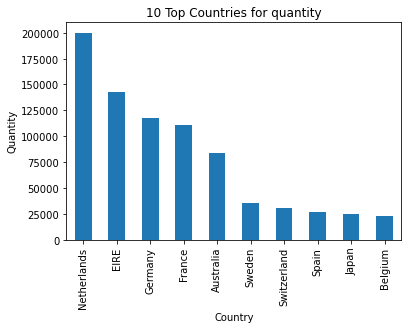

In [87]:
out_uk = online_rt.drop(online_rt[online_rt.Country == 'United Kingdom'].index)
out_uk_10 = out_uk.groupby('Country').sum().sort_values(by = 'Quantity', ascending = False).head(10)
out_uk_10['Quantity'].plot( kind = 'bar', title = '10 Top Countries for quantity', xlabel = 'Country', ylabel = 'Quantity' )

### Step 5.  Exclude negative Quantity entries

In [88]:
online_rt = online_rt[online_rt['Quantity'] > 0]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [102]:
df_customers = online_rt.groupby(['CustomerID','Country']).sum()
df_customers['Country'] = df_customers.index.get_level_values(1)
top_countries =  ['Netherlands', 'EIRE', 'Germany']
df_customers = df_customers[df_customers['Country'].isin(top_countries)]
df_customers

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12426.0,Germany,258,118.09,Germany
12427.0,Germany,533,142.26,Germany
12468.0,Germany,366,133.57,Germany
12471.0,Germany,8212,1978.17,Germany
12472.0,Germany,4148,812.81,Germany
...,...,...,...,...
14016.0,EIRE,2125,635.88,EIRE
14156.0,EIRE,57885,5357.68,EIRE
14335.0,Germany,379,144.24,Germany


In [97]:
import seaborn as sns

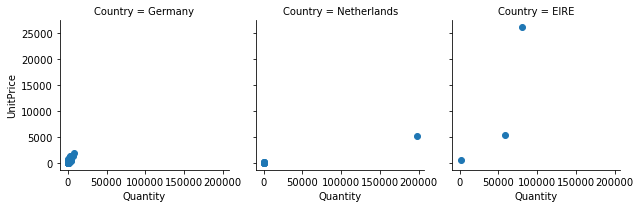

In [103]:
scatt = sns.FacetGrid(customers, col="Country")
scatt.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)